In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [55]:
df = pd.read_csv("data/Salary_Stats_clean.csv")
df.head()

,Salary,Year,Player,Pos,Age,Team,Championship Wins,RunnerUp Count,TRB,AST,...,BLK,TOV,PF,PER,FG%,3P%,FTA,FT%,PTS,Championship Appearance Y/N
0,8800000,1978,Truck Robinson,PF,26,New Orleans Jazz,0.0,1.0,1288.0,171,...,79.0,301.0,265,15.7,0.444,0.0,572,0.640,1862,1.0
1,14800000,1978,Randy Smith,SG,29,Buffalo Braves,0.0,0.0,310.0,458,...,11.0,286.0,224,19.1,0.465,0.0,554,0.800,2021,0.0
2,14700000,1978,Elvin Hayes,PF,32,Washington Bullets,1.0,2.0,1075.0,149,...,159.0,229.0,313,17.1,0.451,0.0,514,0.634,1598,1.0
3,20600000,1978,Dave Cowens,C,29,Boston Celtics,2.0,0.0,1078.0,351,...,67.0,217.0,297,18.6,0.490,0.0,284,0.842,1435,1.0
4,18500000,1978,Bob McAdoo,C,26,New York Knicks,2.0,2.0,1010.0,298,...,126.0,346.0,297,22.0,0.520,0.0,645,0.727,2097,1.0


In [56]:
filtered_df = df[["PTS", "TRB", "AST", "Salary"]]
filtered_df

,PTS,TRB,AST,Salary
0,1862,1288.0,171,8800000
1,2021,310.0,458,14800000
2,1598,1075.0,149,14700000
3,1435,1078.0,351,20600000
4,2097,1010.0,298,18500000
...,...,...,...,...
13800,34,19.0,43,700000
13801,23,9.0,17,700000
13802,18,8.0,5,900000
13803,5,3.0,2,900000


In [57]:
X = np.array(filtered_df[["PTS", "TRB", "AST"]])
y = np.array(filtered_df["Salary"])
print(X.shape)
# print(y.shape)

(13805, 3)


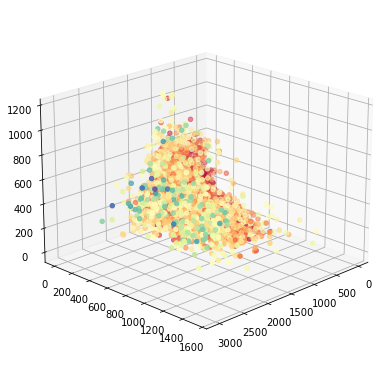

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

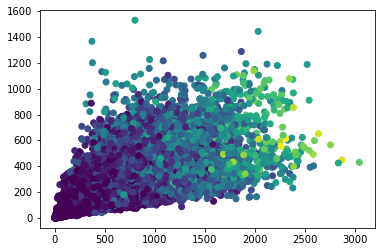

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.5858234499104074


## Model with Unique Player and Salary Records
* Only keep performance and salary information from the last season played
* Assumptions: 
    * Player performance is at its peak during their final season
    * Players are earning their highest salaries during their final season

In [64]:
df2 = pd.read_csv("data/Unique_Salary_clean.csv")
df2.head()

,Salary,Year,Player,Pos,Age,Team,Championship Wins,RunnerUp Count,TRB,AST,...,BLK,TOV,PF,PER,FG%,3P%,FTA,FT%,PTS,Championship Appearance Y/N
0,6800000,1978,John Havlicek,SF,37,Boston Celtics,8.0,0.0,332.0,328,...,22.0,204.0,185,14.3,0.449,0.0,269,0.855,1322,1.0
1,2900000,1978,Dave Bing,PG,34,Boston Celtics,0.0,0.0,212.0,300,...,18.0,216.0,247,13.4,0.449,0.0,296,0.824,1088,0.0
2,800000,1978,Chuck Williams,PG,31,Buffalo Braves,0.0,0.0,137.0,317,...,4.0,156.0,137,9.5,0.477,0.0,138,0.826,530,0.0
3,6100000,1978,Butch Beard,PG,30,New York Knicks,1.0,0.0,264.0,339,...,3.0,154.0,201,14.6,0.502,0.0,160,0.806,745,1.0
4,4000000,1978,E.C. Coleman,PF,27,Golden State Warriors,0.0,0.0,376.0,100,...,23.0,95.0,253,9.1,0.475,0.0,55,0.727,464,0.0


In [65]:
filtered2_df = df2[["PTS", "TRB", "AST", "Salary"]]
filtered2_df

,PTS,TRB,AST,Salary
0,1322,332.0,328,6800000
1,1088,212.0,300,2900000
2,530,137.0,317,800000
3,745,264.0,339,6100000
4,464,376.0,100,4000000
...,...,...,...,...
1888,26,14.0,8,600000
1889,20,17.0,6,700000
1890,23,9.0,17,700000
1891,18,8.0,5,900000


In [66]:
X = np.array(filtered2_df[["PTS", "TRB", "AST"]])
y = np.array(filtered2_df["Salary"])
print(X.shape)
# print(y.shape)

(1893, 3)


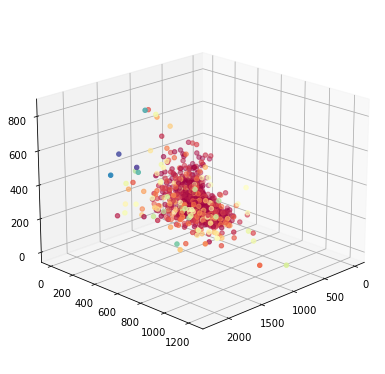

In [67]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.get_cmap("Spectral"))
plt.show()

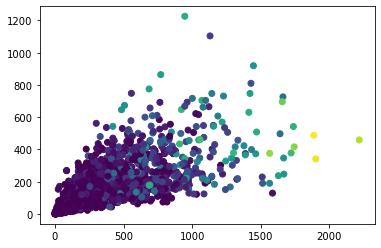

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.4618263513893426
